# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

lfw/Brian_Griese/Brian_Griese_0001.jpg
Number of faces detected: 1


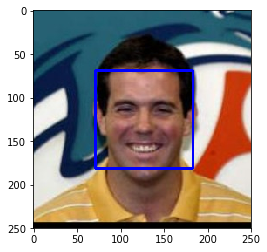

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
index = 10
print(human_files[index])
img = cv2.imread(human_files[index])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
#print(face_detector(human_files_short[0]))
face_det_res = [face_detector(human_files_short[i]) for i in tqdm(range(len(human_files_short)))]
print("Face detector:", len(np.nonzero(face_det_res)[0]), '%')

dog_face_det_res = [face_detector(dog_files_short[i]) for i in tqdm(range(len(dog_files_short)))]
print("Dog face detector:", len(np.nonzero(dog_face_det_res)[0]), '%')


  2%|▏         | 2/100 [00:00<00:06, 15.53it/s]

Face detector: 100 %


100%|██████████| 100/100 [00:05<00:00, 19.03it/s]

Dog face detector: 12 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [8]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [46]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
print(VGG16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [47]:
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img_pil = Image.open(img_path)
    img_tensor = preprocess(img_pil)
    img_tensor.unsqueeze_(0)
    fc_out = VGG16(img_tensor.cuda())   
    output = F.softmax(fc_out)    
    values, indices = output.max(1)
    
    return indices[0].cpu().numpy()#res # predicted class index

In [48]:
print(VGG16_predict(dog_files[0]))

154


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [49]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    class_id = VGG16_predict(img_path)    
    return class_id in range(151, 269) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [13]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dog_det_res = [dog_detector(dog_files_short[i]) for i in tqdm(range(len(dog_files_short)))]
print('Dog detector on dogs:', len(np.nonzero(dog_det_res)[0]), '%')

dog_det_res = [dog_detector(human_files_short[i]) for i in tqdm(range(len(human_files_short)))]
print('Dog detector on humans:', len(np.nonzero(dog_det_res)[0]), '%')

  7%|▋         | 7/100 [00:00<00:01, 68.11it/s]

Dog detector on dogs: 99 %


100%|██████████| 100/100 [00:01<00:00, 68.02it/s]

Dog detector on humans: 0 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [14]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
import os
import torch
from torchvision import datasets
import numpy as np
import torchvision.transforms as transforms

# check if CUDA is available
use_cuda = torch.cuda.is_available()
#use_cuda = False

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406], 
    std=[0.229, 0.224, 0.225]
)

RESIZE = 256
CROPSIZE = 224

#RESIZE = CROPSIZE

preprocess = transforms.Compose([
    transforms.Resize(RESIZE),
    transforms.CenterCrop(CROPSIZE),
    transforms.ToTensor(),
    normalize
])

augment = transforms.Compose([
    transforms.Resize(RESIZE),
    transforms.RandomCrop(CROPSIZE),
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    normalize
])

train_data = datasets.ImageFolder("dogImages/train/", transform=augment)
valid_data = datasets.ImageFolder("dogImages/valid/", transform=preprocess)
test_data = datasets.ImageFolder("dogImages/test/", transform=preprocess)

# define dataloader parameters
batch_size = 15
num_workers=0

# prepare data loaders
loaders_scratch = {}
loaders_scratch['train'] = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
loaders_scratch['valid'] = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
loaders_scratch['test'] = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)




**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: Train, validation and test datasets are resized to 256x256 rectangle. 
Test and validation sets are center cropped to 224x224 rect after that.
Train set is randomly cropped to 224x224 and augmented by random rotation and random flip.
Size 224x224 is chosen because this is the input size for vgg16 classifier.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [6]:
import torch.nn as nn
import torch.nn.functional as F

NCLASSES = 133
DEBUG = 0

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        #self.conv1 = nn.Conv2d(1,1,1)
        # Convolution layers properties: kernel number, kernel size, pooling
        self.convs = [(16, 3 ,1)
                     , (32, 3 ,1) 
                     , (64, 3 ,1)
                     , (256, 3 ,1)]
        """
        # vgg16
        self.convs = [(64, 3 ,0), (64, 3 ,1)
                     , (128, 3 ,0), (128, 3 ,0), (128, 3 ,1) 
                     , (256, 3 ,0), (256, 3 ,0), (256, 3 ,0), (256, 3 ,1) 
                     , (512, 3 ,0), (512, 3 ,0), (512, 3 ,0), (512, 3 ,1)
                     , (512, 3 ,0), (512, 3 ,0), (512, 3 ,0), (512, 3 ,1)
                     , (512, 3 ,0)]
        """
        #self.lnames = []
        self.lastconv = CROPSIZE # Number of neurons in last convolution layer
        # Creating conv layers
        for i in range(len(self.convs)):
            name = 'conv' + str(i+1)
            inputs = 3
            if i > 0:
                inputs = self.convs[i-1][0]
            #self.lnames.append(name)
            setattr(self, name, nn.Conv2d(inputs, self.convs[i][0], self.convs[i][1], padding=1)) 
            if self.convs[i][2]:
                self.lastconv *= 0.5
        print(self.lastconv)
        self.lastconv *= self.lastconv * self.convs[-1][0]        
        # Fully connected properties
        self.fulls = [512, NCLASSES]        
        for i in range(len(self.fulls)):
            name = 'fc' + str(i+1)           
            inputs = int(self.lastconv)
            if i > 0:
                inputs = self.fulls[i-1]
            setattr(self, name, nn.Linear(inputs, self.fulls[i])) 
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout2d(0.25)
        #self.batchnorm = F.Ba
        
    
    def forward(self, x):
        ## Define forward behavior
        for i in range(len(self.convs)):
            name = 'conv' + str(i+1)
            if DEBUG: print(name)
            x = F.relu(getattr(self, name)(x))
            #x = self.dropout2(x)
            if self.convs[i][2]:
                if DEBUG: print("pool")
                x = self.pool(x)
        x = x.view(-1, int(self.lastconv))
        for i in range(len(self.fulls) - 1):
            name = 'fc' + str(i+1)
            if DEBUG: print(name)
            x = F.relu(getattr(self, name)(x))
            x = self.dropout(x)
        name = 'fc' + str(len(self.fulls))
        x = getattr(self, name)(x)
        #x = F.sigmoid(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    print("CUDA")
    model_scratch.cuda()
print(CROPSIZE)
print(model_scratch)

14.0
CUDA
224
Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=50176, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2)
  (dropout2): Dropout2d(p=0.25)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
Classifier has 4 convolution layers with pool operation after each of them and 2 fully connected layers.
First convolution layer is used to detect simple geometric details like lines.
Each next convolution layer detects more common and larger textures and details.
First fully connected layer is used to select important data from convolution layer output (~50k neurons) and "packs" it to 512 neurons. Last layer converts 512 neurons data to classes number outputs (133) probabilities.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [7]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.0001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [8]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    #returns trained model
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            #print("a")
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer_scratch.zero_grad()
            output = model_scratch(data)
            #print(target)
            #print(output)
            loss = criterion_scratch(output, target)
            loss.backward()
            optimizer_scratch.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))    
                
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model_scratch(data)
            loss = criterion_scratch(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            ## update the average validation loss

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            fname = "model_scratch.pt"
            print("Validation loss decreased: %f => %f"%(valid_loss_min, valid_loss))
            print("Saving to %s"%fname)
            torch.save(model_scratch.state_dict(), fname)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


#model_scratch.load_state_dict(torch.load('model_scratch.pt'))
# train the model
model_scratch = train(500, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))


Epoch: 1 	Training Loss: 4.890762 	Validation Loss: 4.890508
Validation loss decreased: inf => 4.890508
Saving to model_scratch.pt
Epoch: 2 	Training Loss: 4.890193 	Validation Loss: 4.890116
Validation loss decreased: 4.890508 => 4.890116
Saving to model_scratch.pt
Epoch: 3 	Training Loss: 4.890003 	Validation Loss: 4.889701
Validation loss decreased: 4.890116 => 4.889701
Saving to model_scratch.pt
Epoch: 4 	Training Loss: 4.889354 	Validation Loss: 4.889351
Validation loss decreased: 4.889701 => 4.889351
Saving to model_scratch.pt
Epoch: 5 	Training Loss: 4.888988 	Validation Loss: 4.888982
Validation loss decreased: 4.889351 => 4.888982
Saving to model_scratch.pt
Epoch: 6 	Training Loss: 4.888681 	Validation Loss: 4.888690
Validation loss decreased: 4.888982 => 4.888690
Saving to model_scratch.pt
Epoch: 7 	Training Loss: 4.888467 	Validation Loss: 4.888256
Validation loss decreased: 4.888690 => 4.888256
Saving to model_scratch.pt
Epoch: 8 	Training Loss: 4.887988 	Validation Loss: 4

KeyboardInterrupt: 

Stopped training manually, because the process was too slow.

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [9]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

model_scratch.load_state_dict(torch.load('model_scratch.pt'))
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.880476


Test Accuracy:  1% (11/836)


### Once More Train-Test Iteration
Training with learning rate 0.0001 was too slow. Increasing lr to 0.001.

In [10]:
criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001)
model_scratch = train(500, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 4.879575 	Validation Loss: 4.875843
Validation loss decreased: inf => 4.875843
Saving to model_scratch.pt
Epoch: 2 	Training Loss: 4.875004 	Validation Loss: 4.870295
Validation loss decreased: 4.875843 => 4.870295
Saving to model_scratch.pt
Epoch: 3 	Training Loss: 4.869705 	Validation Loss: 4.862975
Validation loss decreased: 4.870295 => 4.862975
Saving to model_scratch.pt
Epoch: 4 	Training Loss: 4.863022 	Validation Loss: 4.853197
Validation loss decreased: 4.862975 => 4.853197
Saving to model_scratch.pt
Epoch: 5 	Training Loss: 4.854480 	Validation Loss: 4.840889
Validation loss decreased: 4.853197 => 4.840889
Saving to model_scratch.pt
Epoch: 6 	Training Loss: 4.840297 	Validation Loss: 4.822979
Validation loss decreased: 4.840889 => 4.822979
Saving to model_scratch.pt
Epoch: 7 	Training Loss: 4.823318 	Validation Loss: 4.791779
Validation loss decreased: 4.822979 => 4.791779
Saving to model_scratch.pt
Epoch: 8 	Training Loss: 4.792790 	Validation Loss: 4

Epoch: 78 	Training Loss: 3.748054 	Validation Loss: 4.096923
Epoch: 79 	Training Loss: 3.741374 	Validation Loss: 4.072861
Validation loss decreased: 4.082591 => 4.072861
Saving to model_scratch.pt
Epoch: 80 	Training Loss: 3.720253 	Validation Loss: 4.095550
Epoch: 81 	Training Loss: 3.712700 	Validation Loss: 4.099121
Epoch: 82 	Training Loss: 3.685829 	Validation Loss: 4.147927
Epoch: 83 	Training Loss: 3.668969 	Validation Loss: 4.075811
Epoch: 84 	Training Loss: 3.657135 	Validation Loss: 4.024953
Validation loss decreased: 4.072861 => 4.024953
Saving to model_scratch.pt
Epoch: 85 	Training Loss: 3.637013 	Validation Loss: 4.039687
Epoch: 86 	Training Loss: 3.604741 	Validation Loss: 4.052631
Epoch: 87 	Training Loss: 3.599922 	Validation Loss: 4.054293
Epoch: 88 	Training Loss: 3.585226 	Validation Loss: 4.045118
Epoch: 89 	Training Loss: 3.581262 	Validation Loss: 4.089878
Epoch: 90 	Training Loss: 3.529644 	Validation Loss: 3.997933
Validation loss decreased: 4.024953 => 3.997

Epoch: 203 	Training Loss: 1.463485 	Validation Loss: 4.726320
Epoch: 204 	Training Loss: 1.467790 	Validation Loss: 4.840377
Epoch: 205 	Training Loss: 1.450078 	Validation Loss: 4.745786
Epoch: 206 	Training Loss: 1.430609 	Validation Loss: 4.810932
Epoch: 207 	Training Loss: 1.423568 	Validation Loss: 4.794447
Epoch: 208 	Training Loss: 1.406556 	Validation Loss: 4.892300
Epoch: 209 	Training Loss: 1.394408 	Validation Loss: 4.877722
Epoch: 210 	Training Loss: 1.392196 	Validation Loss: 5.071504
Epoch: 211 	Training Loss: 1.348969 	Validation Loss: 4.861585
Epoch: 212 	Training Loss: 1.324213 	Validation Loss: 4.977318
Epoch: 213 	Training Loss: 1.319184 	Validation Loss: 4.887502
Epoch: 214 	Training Loss: 1.316318 	Validation Loss: 4.872169
Epoch: 215 	Training Loss: 1.356577 	Validation Loss: 4.908535
Epoch: 216 	Training Loss: 1.297274 	Validation Loss: 4.781678
Epoch: 217 	Training Loss: 1.272108 	Validation Loss: 4.924610
Epoch: 218 	Training Loss: 1.286451 	Validation Loss: 4

KeyboardInterrupt: 

In [11]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.977665


Test Accuracy: 13% (115/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [1]:
## TODO: Specify data loaders
import os
import torch
from torchvision import datasets
import numpy as np
import torchvision.transforms as transforms

# check if CUDA is available
use_cuda = torch.cuda.is_available()
#use_cuda = False

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406], 
    std=[0.229, 0.224, 0.225]
)

RESIZE = 256
CROPSIZE = 224

#RESIZE = CROPSIZE

preprocess = transforms.Compose([
    transforms.Resize(RESIZE),
    transforms.CenterCrop(CROPSIZE),
    transforms.ToTensor(),
    normalize
])

augment = transforms.Compose([
    transforms.Resize(RESIZE),
    transforms.RandomCrop(CROPSIZE),
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    normalize
])

train_data = datasets.ImageFolder("dogImages/train/", transform=augment)
valid_data = datasets.ImageFolder("dogImages/valid/", transform=preprocess)
test_data = datasets.ImageFolder("dogImages/test/", transform=preprocess)

# define dataloader parameters
batch_size = 15
num_workers=0

# prepare data loaders
loaders_transfer = {}
loaders_transfer['train'] = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
loaders_transfer['valid'] = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
loaders_transfer['test'] = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [4]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)
# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False
    
n_inputs = model_transfer.classifier[6].in_features

# add last linear layer (n_inputs -> 5 flower classes)
# new layers automatically have requires_grad = True
CLASSES = 133
last_layer = nn.Linear(n_inputs, CLASSES)

model_transfer.classifier[6] = last_layer

# check to see that your last layer produces the expected number of outputs
print(model_transfer.classifier[6].out_features)


if use_cuda:
    model_transfer = model_transfer.cuda()

133


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
Here we have transfer learning example. So, I took vgg16 classifier, trained for a long time on big dataset, as base feature extractor. 
In this classifier I changed last fully-connected layer to make it suitable for my problem (133 classes classification). So, this last layer gets information, extracted by vgg16 part, and transforms it to dog breeds probabilities.
It's a good solution, because vgg16 trained to extract features from real photos and I don't need much time to train it for my task.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [7]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [12]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    #returns trained model
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            #print("a")
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            output = model(data)
            #print(target)
            #print(output)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))    
                
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            ## update the average validation loss

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            fname = save_path
            print("Validation loss decreased: %f => %f"%(valid_loss_min, valid_loss))
            print("Saving to %s"%fname)
            torch.save(model.state_dict(), fname)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [13]:
# train the model
model_transfer = train(50, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 1.788676 	Validation Loss: 1.041960
Validation loss decreased: inf => 1.041960
Saving to model_transfer.pt
Epoch: 2 	Training Loss: 0.984044 	Validation Loss: 0.680813
Validation loss decreased: 1.041960 => 0.680813
Saving to model_transfer.pt
Epoch: 3 	Training Loss: 0.816102 	Validation Loss: 0.645506
Validation loss decreased: 0.680813 => 0.645506
Saving to model_transfer.pt
Epoch: 4 	Training Loss: 0.723942 	Validation Loss: 0.633545
Validation loss decreased: 0.645506 => 0.633545
Saving to model_transfer.pt
Epoch: 5 	Training Loss: 0.653263 	Validation Loss: 0.610543
Validation loss decreased: 0.633545 => 0.610543
Saving to model_transfer.pt
Epoch: 6 	Training Loss: 0.627478 	Validation Loss: 0.540064
Validation loss decreased: 0.610543 => 0.540064
Saving to model_transfer.pt
Epoch: 7 	Training Loss: 0.577353 	Validation Loss: 0.506830
Validation loss decreased: 0.540064 => 0.506830
Saving to model_transfer.pt
Epoch: 8 	Training Loss: 0.568731 	Validation 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [14]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

model_transfer.load_state_dict(torch.load('model_transfer.pt'))
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.492816


Test Accuracy: 85% (718/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


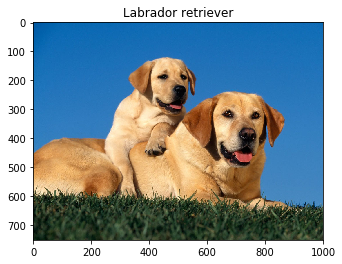

In [58]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
%matplotlib inline 

from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

model_transfer.load_state_dict(torch.load('model_transfer.pt'))
def predict_breed_transfer(img_path, show=False, prefix=""):
    img_pil = Image.open(img_path)
    img_tensor = preprocess(img_pil)
    img_tensor.unsqueeze_(0)
    fc_out = model_transfer(img_tensor.cuda())   
    output = F.softmax(fc_out)    
    values, indices = output.max(1)    
    label = class_names[indices[0].cpu().numpy()]#res # predicted class index
    if show:
        plt.figure()
        plt.imshow(img_pil)  
        plt.title(prefix + label)
    return label

def imshow(path, title=""):
    img_pil = Image.open(path)
    plt.figure()
    plt.imshow(img_pil) 
    plt.title(title)

fname = "./test/dog1.jpeg"
l = predict_breed_transfer(fname, True)

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [53]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    if dog_detector(img_path):
        l = predict_breed_transfer(img_path, True)
    elif face_detector(img_path):
        l = predict_breed_transfer(img_path, True, "Hello, human! You look like: \n")
    else:
        imshow(img_path, "ERROR: no dogs or faces on the photo")
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ Algorithm workes as I expected :)
As possible improvements:
1. Longer dog breed classifier process to achieve better quality
2. Use another (better then vgg16) dog detector
3. Use another (better then Viola-Jones) face detector

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


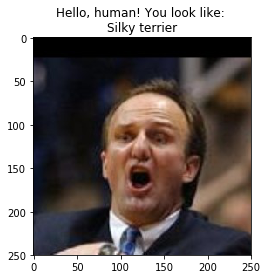

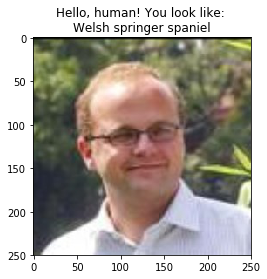

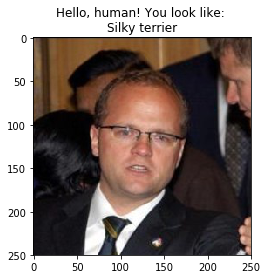

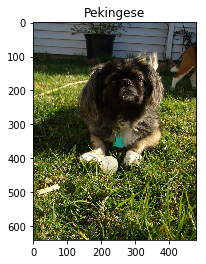

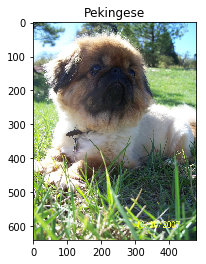

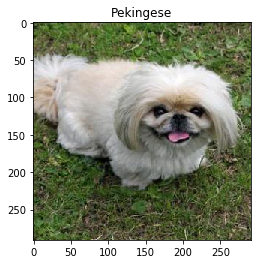

In [54]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


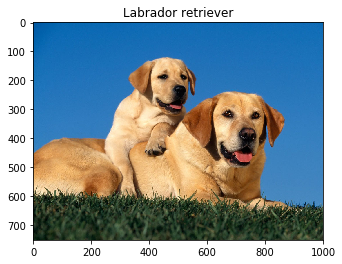

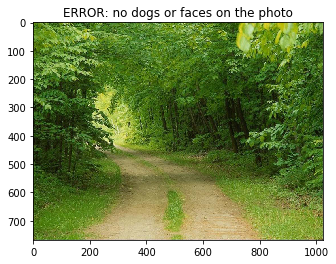

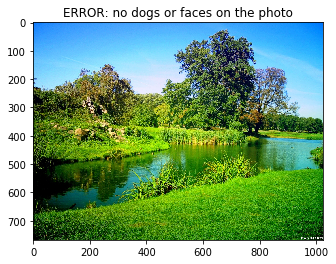

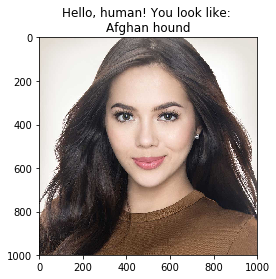

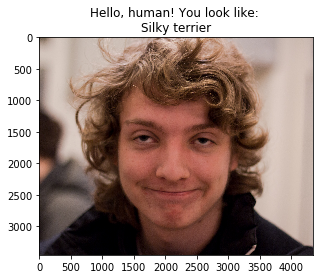

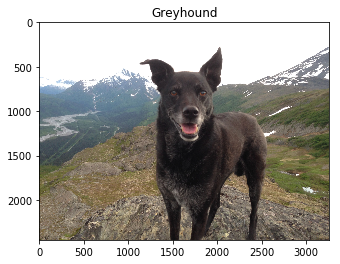

In [57]:
import os.path
catalog = "./test/"
files = [catalog + fname for fname in os.listdir(catalog)]
for file in files:
    run_app(file)